In [3]:
# import intake
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import gribscan
import glob
import intake

# TLDR

Get the data

In [5]:
cat = intake.open_catalog("../catalog.yaml")
run = cat.FESOM["tco2559-ng5"]
data = run.original_3d.to_dask()

Get the grid

In [6]:
grid = run.node_grid.to_dask()
model_lon_fesom = grid.grid_center_lon.values
model_lat_fesom = grid.grid_center_lat.values
model_lon_fesom = np.where(model_lon_fesom>180, model_lon_fesom-360, model_lon_fesom)

Interpolate

In [7]:
lon = np.linspace(-30, 60, 90*10)
lat = np.linspace(33, 72, (72-33)*10)
lon2, lat2 = np.meshgrid(lon, lat)

points_fesom = np.vstack((model_lon_fesom, model_lat_fesom)).T
data_sample = data['temp'][0,0,:]

nn_interpolation = NearestNDInterpolator(points_fesom, data_sample.values)
interpolated_nn = nn_interpolation((lon2, lat2))

Plot

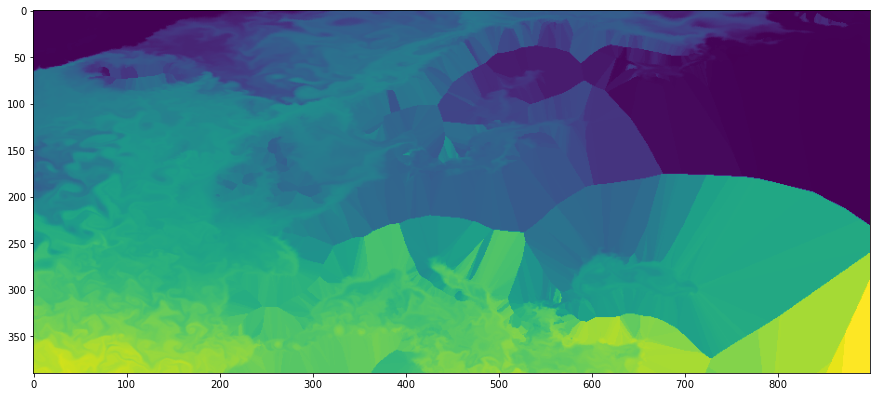

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn))

## Longer version

In [9]:
cat = intake.open_catalog("../catalog.yaml")

In [10]:
cat

__:
  args:
    path: ../catalog.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [11]:
cat.FESOM

FESOM:
  args:
    path: /home/a/a270088/PYTHON/nextgems/NextGems_Cycle2/FESOM/..//catalog/FESOM/main.yaml
  description: FESOM ocean model
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: /home/a/a270088/PYTHON/nextgems/NextGems_Cycle2/FESOM/../


In [12]:
cat.FESOM["tco2559-ng5"]

tco2559-ng5:
  args:
    path: /home/a/a270088/PYTHON/nextgems/NextGems_Cycle2/FESOM/../catalog/FESOM//tco2559-ng5.yaml
  description: 5km experiment, coupuled with IFS
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: /home/a/a270088/PYTHON/nextgems/NextGems_Cycle2/FESOM/../catalog/FESOM/


In [13]:
run = cat.FESOM["tco2559-ng5"]
data = run.original_3d.to_dask()

In [14]:
data

,Array,Chunk
Bytes,5.16 TiB,28.24 MiB
Shape,"(2776, 69, 7402886)","(1, 1, 7402886)"
Count,383101 Tasks,191544 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,5.16 TiB,28.24 MiB
Shape,"(2776, 69, 7402886)","(1, 1, 7402886)"
Count,383101 Tasks,191544 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [15]:
data_sample = data['temp'][0,0,:]

In [16]:
data_sample

<xarray.DataArray 'temp' (nod2: 7402886)>
dask.array<getitem, shape=(7402886,), dtype=float32, chunksize=(7402886,), chunktype=numpy.ndarray>
Coordinates:
    nz1      float64 2.5
    time     datetime64[ns] 2020-01-20T02:56:00
Dimensions without coordinates: nod2
Attributes:
    description:  temperature
    long_name:    temperature
    units:        C

In [17]:
data_sample.shape

(7402886,)

In [18]:
data_sample.values

array([1.5880444, 1.4927025, 1.3117882, ..., 1.4918665, 1.5308464,
       1.453253 ], dtype=float32)

Model Grid

In [21]:
grid = run.node_grid.to_dask()

In [22]:
model_lon_fesom = grid.grid_center_lon.values
model_lat_fesom = grid.grid_center_lat.values
model_lon_fesom = np.where(model_lon_fesom>180, model_lon_fesom-360, model_lon_fesom)

In [23]:
model_lat_fesom.shape

(7402886,)

Target grid

In [24]:
lon = np.linspace(-30, 60, 90*10)
lat = np.linspace(33, 72, (72-33)*10)
lon2, lat2 = np.meshgrid(lon, lat)

In [25]:
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator

In [26]:
points_fesom = np.vstack((model_lon_fesom, model_lat_fesom)).T

In [27]:
nn_interpolation = NearestNDInterpolator(points_fesom, data_sample.values)

In [28]:
interpolated_nn = nn_interpolation((lon2, lat2))

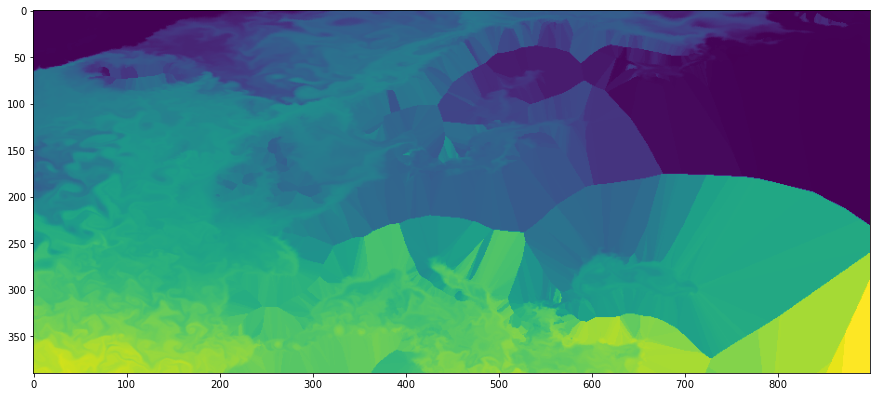

In [29]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn))

## Find point on the map

In [30]:
def tunnel_fast1d(latvar, lonvar, lonlat):
    """
    Find closest point in a set of (lat,lon) points to specified pointd.
    Parameters:
    -----------
        latvar : ndarray
            1d array with lats
        lonvar : ndarray
            1d array with lons
        lonlat : ndarray
            2d array with the shape of [2, number_of_point],
            that contain coordinates of the points
    Returns:
    --------
        node : int
            node number of the closest point
    Taken from here http://www.unidata.ucar.edu/blogs/developer/en/entry/accessing_netcdf_data_by_coordinates
    and modifyed for 1d
    """

    rad_factor = np.pi / 180.0  # for trignometry, need angles in radians
    # Read latitude and longitude from file into numpy arrays
    latvals = latvar[:] * rad_factor
    lonvals = lonvar[:] * rad_factor

    # Compute numpy arrays for all values, no loops
    clat, clon = np.cos(latvals), np.cos(lonvals)
    slat, slon = np.sin(latvals), np.sin(lonvals)

    clat_clon = clat * clon
    clat_slon = clat * slon

    lat0_rad = lonlat[1, :] * rad_factor
    lon0_rad = lonlat[0, :] * rad_factor

    delX_pre = np.cos(lat0_rad) * np.cos(lon0_rad)
    delY_pre = np.cos(lat0_rad) * np.sin(lon0_rad)
    delZ_pre = np.sin(lat0_rad)

    nodes = np.zeros((lonlat.shape[1]))
    for i in range(lonlat.shape[1]):
        delX = delX_pre[i] - clat_clon
        delY = delY_pre[i] - clat_slon
        delZ = delZ_pre[i] - slat
        dist_sq = delX ** 2 + delY ** 2 + delZ ** 2
        minindex_1d = dist_sq.argmin()  # 1D index of minimum element
        node = np.unravel_index(minindex_1d, latvals.shape)
        nodes[i] = node[0]

    return nodes.astype('int')

In [31]:
lon_target = -10
lat_target = 50

In [32]:
points = np.array([[lat_target],[lon_target]])

In [33]:
index = tunnel_fast1d(model_lon_fesom, model_lat_fesom, points)

In [34]:
model_lon_fesom[index[0]]

-9.98054651787038

In [35]:
model_lat_fesom[index[0]]

50.0033501087575

In [36]:
data['temp']

,Array,Chunk
Bytes,5.16 TiB,28.24 MiB
Shape,"(2776, 69, 7402886)","(1, 1, 7402886)"
Count,383101 Tasks,191544 Chunks
Type,float32,numpy.ndarray


In [37]:
data['temp'][:, 0, index[0]]

<xarray.DataArray 'temp' (time: 2776)>
dask.array<getitem, shape=(2776,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    nz1      float64 2.5
  * time     (time) datetime64[ns] 2020-01-20T02:56:00 ... 2020-12-31T23:56:00
Attributes:
    description:  temperature
    long_name:    temperature
    units:        C

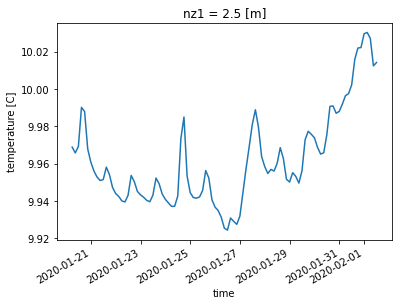

In [38]:
data['temp'][1:100,0, index[0]].plot()

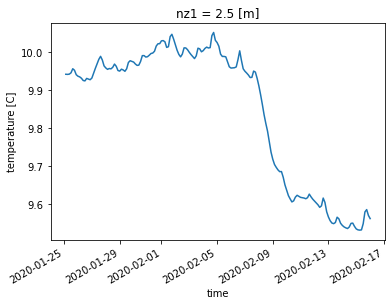

In [39]:
data['temp'].sel(time=slice('2020-01-25','2020-02-15'))[:, 0 , index[0]].plot()

## Masking land

In [40]:
def lon_lat_to_cartesian(lon, lat, R=6371000):
    """
    calculates lon, lat coordinates of a point on a sphere with
    radius R. Taken from http://earthpy.org/interpolation_between_grids_with_ckdtree.html
    """
    lon_r = np.radians(lon)
    lat_r = np.radians(lat)

    x = R * np.cos(lat_r) * np.cos(lon_r)
    y = R * np.cos(lat_r) * np.sin(lon_r)
    z = R * np.sin(lat_r)
    return x, y, z

In [41]:
def create_indexes_and_distances(model_lon, model_lat, lons, lats, k=1, workers=2):
    """
    Creates KDTree object and query it for indexes of points in FESOM mesh that are close to the
    points of the target grid. Also return distances of the original points to target points.
    Parameters
    ----------
    mesh : fesom_mesh object
        pyfesom mesh representation
    lons/lats : array
        2d arrays with target grid values.
    k : int
        k-th nearest neighbors to return.
    n_jobs : int, optional
        Number of jobs to schedule for parallel processing. If -1 is given
        all processors are used. Default: 1.
    Returns
    -------
    distances : array of floats
        The distances to the nearest neighbors.
    inds : ndarray of ints
        The locations of the neighbors in data.
    """
    xs, ys, zs = lon_lat_to_cartesian(model_lon, model_lat)
    xt, yt, zt = lon_lat_to_cartesian(lons.flatten(), lats.flatten())

    tree = cKDTree(list(zip(xs, ys, zs)))
    distances, inds = tree.query(list(zip(xt, yt, zt)), k=k, workers=workers)

    return distances, inds

In [42]:
from scipy.spatial import cKDTree

In [43]:
distances, inds = create_indexes_and_distances(model_lon_fesom, model_lat_fesom, lon2, lat2, k=1, workers=10)

In [44]:
radius_of_influence=5000
data_interpolated = data_sample.values[inds]
data_interpolated[distances >= radius_of_influence] = np.nan
data_interpolated = data_interpolated.reshape(lon2.shape)
data_interpolated = np.ma.masked_invalid(data_interpolated)

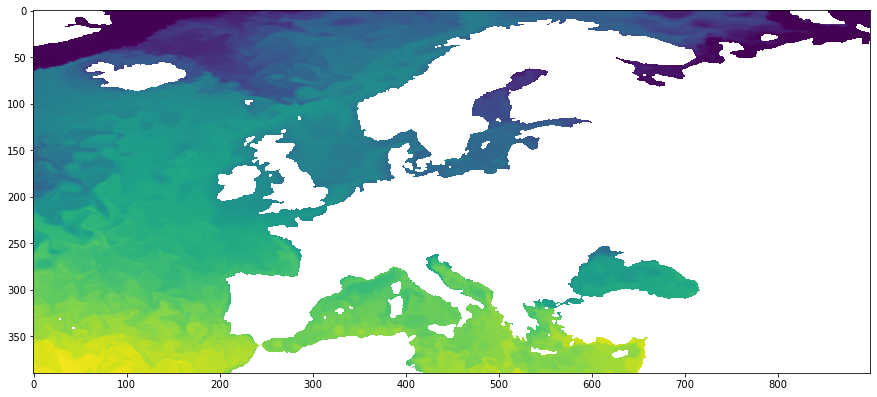

In [45]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(data_interpolated))